# Edge Detection  Using Sobel,Prewitt Operator and Laplacian Operator

## What is an Edge
Area where there are extreme differences in the intensities of the pixel usually indicate an edge of an object.
## Types Of Edges

These are the main types of ideal edges present in images. The way that the image intensity changes in an image determines the type of edge that is present at that position.The Figure 1 helps to illustrate these differences by using a line to represent the image intensities of pixels against distance in the x or y direction of an image .

**a\.** *Step Edge* - Where image intensity immediately increases over a distance. <br>
**b\.** *Ramp Edge* - Where image intensity gradually increases over a distance. <br>
**c\.** *Roof Edge* - Where image intensity spikes up temporarily over a distance.

[Article and Image Reference](http://www.doc.ic.ac.uk/~ts2615/contribution.html#1)

<img src="images/edge_type.jpg" width="440" height="440" align="center"/>

### Import required libraries

In [1]:
#import required library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpig
%matplotlib inline

## Read the image in grayscale

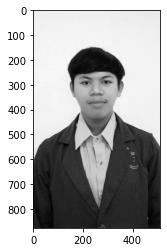

In [2]:
#read the gray scale image
image = cv2.imread('output/mario.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

## Using Sobel operator

Sobel is very common operator to detect edges of an image, which is an approximation to a derivative of an image.It is separate in the y and x directions. Here We use a kernel 3*3 matrix, one for each x and y direction. The gradient for x-direction has minus numbers on the left and positive numbers on the right and we are preserving the center pixels.Similarly, the gradient for y-direction has minus numbers on the bottom and positive numbers on top and here we the middle row pixels.

<img src="images/sobel_con_kernels.png" width="440" height="440" align="center"/>

In [3]:
#define horizontal and Vertical sobel kernels
Gx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
Gy = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

## Define kernel Convolution function
Convolution function a way of multiplying together two arrays of numbers, generally of different sizes,**here gray scale image and sobel/prewitt kernels**, to produce a third array of numbers of the same dimensionality. The convolution is performed by sliding the applied kernel over all the pixels of the image.<br>
**A** is the source image and * denotes the convolution operation.




\begin{equation*}
\mathbf{G}_x \ =  \begin{vmatrix}
\mathbf{-1} & \mathbf{0} & \mathbf{+1} \\
\mathbf{-2} & \mathbf{0} & \mathbf{+2} \\
\mathbf{-1} & \mathbf{0} & \mathbf{+1} \\
\end{vmatrix}\mathbf{*}_A
\end{equation*}


\begin{equation*}
\mathbf{G}_y \ =  \begin{vmatrix}
\mathbf{+1} & \mathbf{+2} & \mathbf{+1} \\
\mathbf{0} & \mathbf{0} & \mathbf{0} \\
\mathbf{-1} & \mathbf{-2} & \mathbf{-1} \\
\end{vmatrix}\mathbf{*}_A
\end{equation*}

In [4]:
# Menentukan fungsi konvolusi kernel
# dengan gambar X dan filter F
def convolve(X, F):
    # height and width of the image
    X_height = X.shape[0]
    X_width = X.shape[1]
    
    # height and width of the filter
    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2
    
    #output numpy matrix with height and width
    out = np.zeros((X_height, X_width))
    #iterate over all the pixel of image X
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            #iterate over the filter
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    #get the corresponding value from image and filter
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    #return convolution  
    return out

In [5]:
#normalizing the vectors
sob_x = convolve(image, Gx) / 8.0
sob_y = convolve(image, Gy) / 8.0

## Gradient magnitude
The gradient component in each orientation then combined together to find the absolute magnitude of the gradient at each point and the orientation of that gradient.

In [6]:
#calculate the gradient magnitude of vectors
sob_out = np.sqrt(np.power(sob_x, 2) + np.power(sob_y, 2))
# mapping values from 0 to 255
sob_out = (sob_out / np.max(sob_out)) * 255

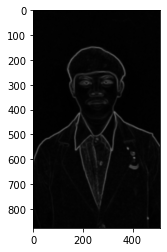

In [7]:
#output images
cv2.imwrite('output/sobel_jet.jpg', sob_out)
plt.imshow(sob_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()

## Using prewitt operator 

Prewitt operator is similar to the Sobel operator and is used for detecting vertical and horizontal edges in images.It provides us two masks one for detecting edges in horizontal direction and another for detecting edges in an vertical direction.

<img src="images/prewitt's_kernel.png" width="440" height="440" align="center"/>

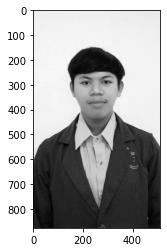

In [8]:
#read the image in gray scale
img = cv2.imread('output/mario.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')

In [9]:
#define horizontal and Vertical sobel kernels
Hx = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

In [10]:
#normalizing the vectors
pre_x = convolve(img, Hx) / 6.0
pre_y = convolve(img, Hy) / 6.0

In [11]:
#calculate the gradient magnitude of vectors
pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
# mapping values from 0 to 255
pre_out = (pre_out / np.max(pre_out)) * 255

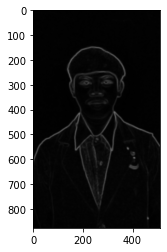

In [12]:
#output images
cv2.imwrite('output/prewitt_knife.jpg', pre_out)
plt.imshow(pre_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()

## Using Laplacian Operator

Unlike the Sobel and prewitt edge detector, the Laplacian edge detector uses only one kernel. It calculates second order derivatives in a single pass. Here's the kernel used for it:

<img src="images/laplacian_kernel.png" width="440" height="440" align="center"/>

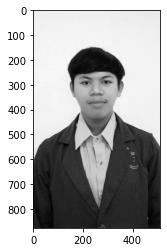

In [13]:
#read the image in gray scale
img2 = cv2.imread('output/mario.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img2,cmap='gray')

## Gaussian blur
Because these masks are approximating a second derivative measurement on the image, they are very sensitive to noise. To correct this, the image is often Gaussian smoothed before applying the Laplacian filter.

In [14]:
#apply gaussian blur
blur_img = cv2.GaussianBlur(img2, (3, 3), 0)

In [15]:
# Positive Laplacian Operator
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)

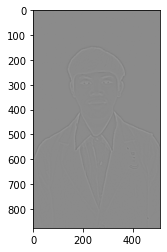

In [16]:
cv2.imwrite('output/lap_butterfly.jpg', laplacian)
plt.imshow(laplacian, cmap = 'gray',interpolation = 'bicubic')
plt.show()